In [67]:
import pandas as pd
from sklearn.datasets import load_boston
bostonData = load_boston()
X = bostonData["data"]
Y = bostonData["target"]
names = bostonData["feature_names"]


boston = pd.DataFrame(bostonData.data, columns=bostonData.feature_names)
boston.head()

boston['MEDV'] = Y
boston.isnull().sum() 

#b      # 0 null values in the dataset

#boston.head()
len(names),names

(13, array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7'))

In [68]:
bostonData.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

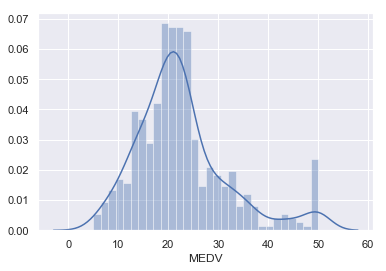

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(6,4)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

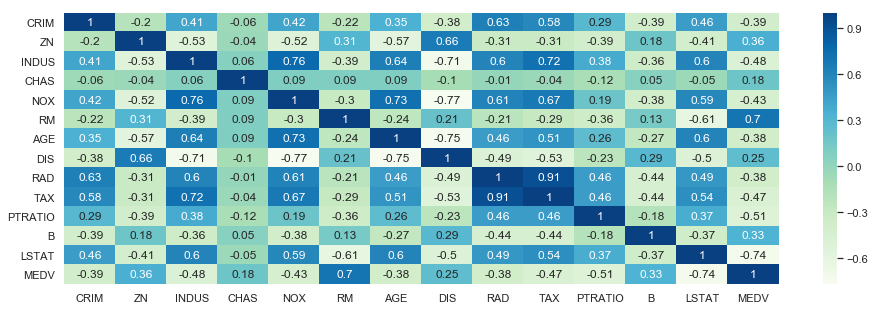

In [70]:
correlation_matrix = boston.corr().round(2)
correlation_matrix
plt.figure(figsize = (16,5))
sns.heatmap(data=correlation_matrix,annot=True,cmap="GnBu")

we can see that features 'RM','LSTAT and our target variable are strongly correlated. 
we can use only these features to predict the house price but by droping the other variables we may loose important information 



In [71]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [72]:
scaler=StandardScaler()#instantiate
scaler.fit(boston) # compute the mean and standard which will be used in the next command
X_scaled=scaler.transform(boston)



In [73]:
from sklearn.decomposition import PCA

In [74]:
pca=PCA(n_components = 2) 
pca.fit(X_scaled) 
X_pca=pca.transform(X_scaled) 
print("shape of X_pca"), X_pca.shape

shape of X_pca


(None, (506, 2))

In [75]:
X_pca
principalDf = pd.DataFrame(data = X_pca
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, boston[['MEDV']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,MEDV
0,-2.087344,0.492853,24.0
1,-1.373382,-0.170923,21.6
2,-2.376553,0.914027,34.7
3,-2.837779,0.194870,33.4
4,-2.772916,0.433299,36.2


In [76]:
import numpy as np
ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

[0.79872765 0.20127235]


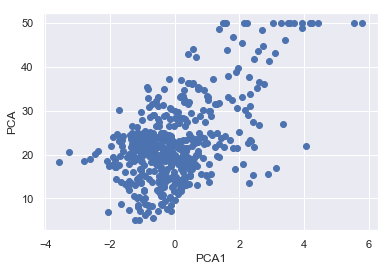

In [77]:
target = finalDf['MEDV']
y = np.random.rand(506)
pc1= finalDf['principal component 1']
pc2= finalDf['principal component 2']
plt.scatter(pc2,target)
#plt.scatter(pc1,y)
plt.xlabel("PCA1")
plt.ylabel("PCA")
plt.show()


#plt.scatter(pc2,y)

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(finalDf[['principal component 1','principal component 2']],finalDf['MEDV'],test_size=0.2,random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 102
number of training samples: 404


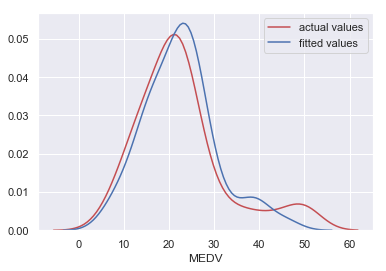

In [86]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
trainhat = model.predict(x_train)
testhat = model.predict(x_test)
#print(trainhat, trainhat)
ax1 = sns.distplot(y_test,hist=False,color = "r",label = "actual values")
sns.distplot(testhat,hist=False,color="b",label="fitted values",ax=ax1)

In [92]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test,testhat) 
c1 = pd.DataFrame(y_test)
c2 = pd.DataFrame(testhat)
df1 = pd.co             


,MEDV,0
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN
